# Introduction

## Motivation

In our project we aim to use data visualisation and analysis to provide insights for prospective BSc Data Science applicants on parts of the application process. 

The main motivating factor for us to choose this topic for our project was the fact that as applicants for BSc Data Science last year we found it difficult to find the information that we were looking for about admission rates and what to write in our personal statements since Data Science was a relatively new course so the admission rates were not year explicitly published on the course website and it is not a subject that we had previously studied.

Then as successful offer holders for this course we had to choose between Finance and Maroeconomics, as we had no prior experience studying neither Finance nor Economics as a university level and therefore did not yet know where our interest lay, we wanted to ensure that we didn't choose a module which would later reduce our potential optional modules as the other module was a pre-requisite for those optional modules. However we found it difficult to process how all the optional and compulsary modules linked together since many second and third year required a range of different pre-requisite courses and it was quite difficult to navigate through all of these on the BSc Data Science course site. Therefore we also wanted to provide insight on how certain modules may limit course choices in secod and third year. 

Our visualisations and analysis will delve into 2 main areas of the application process for prospective Data Science students, course admission rates for the LSE Statisitcs Department and BSc Data science personal statements, as well as provide an insight into which course choices are available for successful applicants. These areas will be explored through the 3 main questions for our project, featured below.

## Goal of the Study

- How have the number of applicants, offer holders and acceptees for each course in the LSE Statistics department changed overtime? 


- What are the main topics that LSE BSc Data Science students talk about in their personal statement? 


- What compulsory and optional modules in BSc Data Science require pre-requisite modules? Which modules allow a BSc Data Science student a wider range of options over the course of their degree?

Each of these question areas will take up a section of our report, with each section containing respective data aquistion, preparation and EDA sub-sections. Then our main findings and results will be summarised in the conclusion.

SECTION 1: Application Trends

SECTION 2: Personal Statement insights

SECTION 3: Module choices 

# SECTION 1: Application Trends

### Data aquisition


### Data preparation

### EDA 

# SECTION 2: Using Natural Language Processing to derive insights from BSc Data Science personal statements

### Data aquisition 

The data used in this section consists of 10 successful BSc Data Science personal statements, representing 50% of the cohort for 2022. The personal statements can be used with the NLTK library to perform Natural Language Processing to derive insights on what topics are present in successful personal statements to aid prospective applicants since they have not studied data science before and may not know what areas to research about.

Using NPL the following things will be identified from the personal statements:
- Main topics (Using Topic Modelling)
- Top 10 most frequent words - this may be more insightful than topic modelling as topic modelling is an unsupervised machine learning algorithm it is not always as effective as desired 
- Readability levels - This will be calculated using the Flesch-Kincaid Grade Level Forumla which calculates the grade level needed to understand a text using the average syllables per word and the average number of words per sentence. 

The individual personal statements were collated into a single txt file called 'ST115_personal statements'. This was then imported, read and each personal statement was separated and stored in a pandas dataframe

### Data preparation

In [44]:
import pandas as pd

# Reading the text file
with open('ST115_personal_statements.txt', 'r') as file:
    all_ps = file.read()

# Displaying the first 1000 characters of the text file
all_ps[:1000]

'Personal statement:\nTaking part in a coding competition and several UKMT challenges exposed me to new ways of approaching problems from what I was used to in school. The challenge of having to think differently about problems and eventually arrive at solutions after reaching dead-ends was something I relished doing, which convinced me that a quantitative degree was for me.\nI have continued to challenge myself and explore the interplay between computer science and mathematics by solving Project Euler problems. For example, I used recursion to compute the convergents of continued fractions of the square root of 2. These problems nurtured my interest in pure mathematics, leading me to read Kevin Houston\'s "How to Think like a Mathematician". This introduced me to more sophisticated inductive proof techniques than the ones I learned at A-level. To supplement this, I explored how Lean, a programming language, can be taught to inductively prove a simple addition from first principles. Wh

Looking at the first 1000 characters shown above it can be seen that some intial data cleaning must be done in the sense of removing '\n' and any backslashes in general.
Also we want to manipulate this text data in order to store all the different personal statements as one text to do topic modelling with and to store them as individual statements to calculate readability and key people.

In [46]:
#Inital removal of '\n' and backslashes
all_ps = all_ps.replace("\n", " ")
all_ps = all_ps.replace("\xa0", "")
all_ps = all_ps.replace("\'", "")

<b> STEP 1: Creating a dataframe for the personal statements </b>
- Creating a dataframe where each row accounts for a single personal statement. 

In [48]:
# This phrase has been used in the text file to indicate the start of a different personal statement
individual_statements = all_ps.split('Personal statement:')

ps_df = pd.DataFrame({'Personal Statements': individual_statements})

#The first row is empty so it is removed
ps_df = ps_df.drop(index=0).reset_index(drop=True)


<b> STEP 2: Calculating Readability </b>

Creating the Flesch-Kincaid function to calculate the readability scores 

In [49]:
import re

def count_syllables(word):
    '''
    Helper function to count the number of sylables in a given word
    Input: 
    word : string
    
    Output:
    num_vowels : int
    '''
    num_vowels = len(re.findall(r'[aeiouy]+', word))

    # Subtract the number of silent e's at the end of the word
    if re.search(r'e$', word):
        num_vowels -= 1

    # Subtract one for each diphthong
    num_vowels -= len(re.findall(r'[aeiouy]{2}', word))

    # Add one if the word ends in "-le"
    if re.search(r'le$', word):
        num_vowels += 1

    # Add one if the word is one syllable and ends in a consonant followed by "y"
    if len(re.findall(r'^[^aeiouy]+[aeiouy]+[^aeiouy]+y$', word)):
        num_vowels += 1

    return max(1, num_vowels)

def flesch_kincaid_grade(text):
    '''
    The function uses the Flesch-Kincaid formula to calculate the grade level required to be able to read a specificed text
    
    Inputs: 
    text : string
    The text to calculate the readability level of 
    
    Outputs: 
    grade_level : float
    Grade age of readability 
    '''
    text = text
    sentences = text.split('.')
    words = text.split()

    # Calculate the average number of words per sentence
    words_per_sentence = len(words) / len(sentences)

    # Calculate the average number of syllables per word
    syllables = 0
    for word in words:
        syllables += count_syllables(word)
    syllables_per_word = syllables / len(words)

    grade_level = 0.39 * words_per_sentence + 11.8 * syllables_per_word - 15.59
    
    grade_level = round(grade_level, 1)

    return grade_level

Applying the function to all the personal statements

In [50]:
ps_df['Readability Age Grade'] = ps_df['Personal Statements'].apply(flesch_kincaid_grade)


In [51]:
ps_df

Personal Statements  Readability Age Grade
0   Taking part in a coding competition and sever...                   12.5
1   Mathematics and the social sciences are seen ...                   14.5
2    Data Science appealed to me as it offers a n...                   14.0
3   My interest in data analytics stems from an e...                   13.3
4    Growing up on the football pitch, I learnt t...                   10.5
5   I have always been drawn to figures and data,...                   12.1
6   Data is one of the most valuable tools that t...                   11.7
7   I couldn’t believe what I saw. After looking ...                   14.0
8    I believe that the intersection of mathemati...                   13.6
9    Seeing how influential big data is in shapin...                   13.8

<b> STEP 3: NLP Preprocessing tasks</b> 

The following tasks will be carried out in this section: 
- Tokenisation
- Stop word removal
- Lemmatisation
- POS tagging
- TF-IDF
    

<b>Tokenisation:</b>

In [52]:
import nltk
import string
from nltk.tokenize import word_tokenize

ps_df['Tokens'] = ps_df['Personal Statements'].apply(lambda x: x.lower()).apply(word_tokenize)

ps_df['Tokens'] = ps_df['Tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])


<b> Removing stop words </b>

In [53]:
from nltk.corpus import stopwords
sw = stopwords.words('English')

ps_df['Filtered Tokens'] = ps_df['Tokens'].apply(lambda tokens: [token for token in tokens if token not in sw])

Checking if there are any words that are still in tokens and not in the NLTK stopwords that should be taken out

In [55]:
full_token_dict = {}

for row in ps_df['Filtered Tokens']:
    for token in row:
        if token in full_token_dict: 
            full_token_dict[token] += 1
        else: 
            full_token_dict[token] = 1

sorted_dict = sorted(full_token_dict.items(), key=lambda x: x[1], reverse=True)

sorted_dict[:10]


[('data', 109),
 ('’', 42),
 ('learning', 41),
 ('science', 37),
 ('using', 24),
 ('machine', 23),
 ('used', 21),
 ('social', 17),
 ('mathematics', 16),
 ('models', 15)]

As can be seen the only tokens that were not in stop words that should be taken out are punctuation which were not caught by string.punctuation

In [56]:
#Taking out left over punctuation

ps_df['Filtered Tokens'] = ps_df['Filtered Tokens'].apply(lambda tokens: [token for token in tokens if token not in ['’', '‘', '``', "''", '“', '”']])

<b> Lemmatisation and POS Tagging </b>

In [66]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

ps_df['Tagged Tokens'] = ps_df['Filtered Tokens'].apply(lambda x: pos_tag(x))


In [82]:
def get_wordnet_pos(tag):
    first_letter = tag[0]
    if first_letter == 'J': return wordnet.ADJ
    if first_letter == 'V': return wordnet.VERB
    if first_letter == 'N': return wordnet.NOUN
    if first_letter == 'R': return wordnet.ADV
    return None 

lemmatiser = WordNetLemmatizer()

def lemmatise(tokens):
    lemmatised_tokens = []
    for token, tag in tokens:
        pos = get_wordnet_pos(tag)
        if pos is None:
            lemma = lemmatiser.lemmatize(token)
        else:
            lemma = lemmatiser.lemmatize(token, pos)
        lemmatised_tokens.append(lemma)
    return lemmatised_tokens

ps_df['Lemmatised Tokens'] = ps_df['Tagged Tokens'].apply(lemmatise)



<b> TF-IDF </b>

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = []

for i in range(0, 10): 
    lemmatised_tokens = ps_df.loc[i]['Lemmatised Tokens']
    document = ' '.join(lemmatised_tokens)
    documents.append(document)
    
vectorizer = TfidfVectorizer()

tf_idf_matrix = vectorizer.fit_transform(documents)


<10x1447 sparse matrix of type '<class 'numpy.float64'>'
	with 2535 stored elements in Compressed Sparse Row format>

<b> STEP 4: Topic Modelling </b>

In [176]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

lda_model.fit(tf_idf_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [177]:
feature_names = vectorizer.get_feature_names()
n_top_words = 10
for topic_idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
data poverty social work mpi night relevant learn team science
Topic #1:
data use company business technology firm show math work end
Topic #2:
machine data model big learn theorem learning use increase practice
Topic #3:
data use learn machine network function problem science one understand
Topic #4:
science data communication lead level see social element value allocation


### Findings (EDA)

<b> Findings from Topic modelling </b>

From this it can be seen that some of the main topics discussed in successful BSc Data Science personal statements include: 
- Applications of Data Science to the social sciences
- Work experience and data science in the context of companies
- Machine learning models and learning about the theory behind it

<b> Top 10 Words</b>

In [181]:
#Top 10 words

lemma_dict = {}

for row in ps_df['Lemmatised Tokens']:
    for token in row:
        if token in lemma_dict: 
            lemma_dict[token] += 1
        else: 
            lemma_dict[token] = 1

top_words_dict = sorted(lemma_dict.items(), key=lambda x: x[1], reverse=True)

top_words_dict[:11]

[('data', 110),
 ('use', 58),
 ('learn', 45),
 ('science', 41),
 ('machine', 26),
 ('problem', 21),
 ('find', 21),
 ('model', 20),
 ('social', 17),
 ('allow', 17),
 ('think', 16)]

Using the top 10 lemmatised words is can be seen that key topics which are talked about are data science, machine learning, applications to social science. Whilst verbs such as 'use', 'learn' 'find', 'allow' and 'think' can indicate how students applying have engaged with these topics. 

Although it may seem like a large abstraction these key words show that successful BSc Data Science applicants have talked a lot about Data Science and Machine learning in their personal statements as well as the social issues they realte to. Despite this seeming like an obvious insight, it is useful to keep in mind for prospective applicants who may not only be applying to Data cience but other related courses such as Computer Science, Mathematics and Statistics, these applicants should be aware that they should aim to keep their personal statements related to Data science primarily.

<b> Readability levels </b>

In [183]:
import plotly.express as px

fig = px.histogram(ps_df, x="Readability Age Grade")
fig.show()

Using the age grade conversions between the US and UK grade system: 
- US Grade 10 = UK Year 11
- US Grade 11 = UK Year 12
- US Grade 12 = UK Year 13
- US Grade 13/14 = UK University level

It can be seen that 60% of the personal statements required a University level of understanding in order to be read, this may be due to the academic topics which are discussed in teh personal statements. Prospective applicants should ensure that their writing complexity is greater than or equal that of the complexity of writing taught in Year 11.

# SECTION 3: Using webscraping the pre-requisites of compulsory and optional modules for BSc Data Science

### Data acquisition


- Datasets: We used webscraping to retrieve data from LSE website about BSc Data Science course structure, such as pre-requisites for each module for all 3 years, if there are any. We did not include A-level Mathematics as a pre-requisite.
https://www.lse.ac.uk/resources/calendar2021-2022/programmeRegulations/undergraduate/2021/BScDataScience.htm

- The data we collected is stored in 'pre-requisites' dictionary, which has course codes as keys and list of pre-requisites for that course as values. We webscraped the data from LSE website on the 20th of April at 3pm.

The webscraping code has been included in the data preparation section below

### Data preparation 

<b> Importing the data </b>

In [5]:
import requests
from bs4 import BeautifulSoup
import re

url = 'https://www.lse.ac.uk/resources/calendar2021-2022/programmeRegulations/undergraduate/2021/BScDataScience.htm'
r = requests.get(url)
soup = BeautifulSoup(r.content,'lxml')

# Looking at the contents of the webpage
soup.contents

[<html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>BSc in Data Science</title>
 <meta content="en-gb" http-equiv="Content-Language"/>
 <meta content="Calendar web editor" name="dc.creator"/>
 <meta content="calendar@lse.ac.uk" name="dc.creator.email"/>
 <meta content="Academic Registrar's Division" name="lse.pagesource"/>
 <meta content="Fri Sep 24 16:54:48 BST 2021" name="lse.publishDate"/>
 <link href="/css/capis.css" rel="stylesheet" type="text/css"/>
 <link href="../../../Default.htm" rel="start" title="Calendar"/>
 <link href="../../../undergraduate.htm" rel="prev" title="Undergraduate"/>
 <link href="../Default.htm" rel="prev" title="Programme regulations"/>
 <link href="Default.htm" rel="prev" title="2021"/>
 <script type="text/javascript">
 function getParams ()
 {
     var result = {};
     var tmp = [];
 
     location.search
         .substr (1)
         .split ("&")
         .forEach (function (item)
         {
             tmp = i

<b> Extracting module codes and their links </b> 

In [6]:
modules = {}

for tag in soup.find_all('td', colspan="2"):
    
    a_tag = tag.find('a')
    
    #checking if tags like <td colspan="2"><p><a... exist
    if a_tag:
        
        module_code = a_tag.get_text().strip()
        
        if module_code not in ['Options list','Paper 10 options list','Papers 10 & 11 options list','LSE100']:
            
            #finding the link for each course code
            module_link = a_tag['href'].replace('../../..', 'https://www.lse.ac.uk/resources/calendar')
            modules[module_code] = module_link
    
modules

{'ST102': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2021_ST102.htm',
 'MA100': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2021_MA100.htm',
 'ST101': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2021_ST101.htm',
 'EC1A3': 'https://www.lse.ac.uk/resources/calendar/courseGuides/EC/2021_EC1A3.htm',
 'EC1B3': 'https://www.lse.ac.uk/resources/calendar/courseGuides/EC/2021_EC1B3.htm',
 'FM101': 'https://www.lse.ac.uk/resources/calendar/courseGuides/FM/2021_FM101.htm',
 'MA102': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2021_MA102.htm',
 'MA222': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2021_MA222.htm',
 'ST206': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2021_ST206.htm',
 'ST202': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2021_ST202.htm',
 'MA214': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2021_MA214.htm',
 'ST310': 'https://www.lse.ac.uk/resources/calendar/courseGuides/

<b> Looking at the contents of a single webpage from above </b>

In [8]:
url = 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2021_MA102.htm'
r = requests.get(url)
soup = BeautifulSoup(r.content,'lxml')

# Looking at the contents of the webpage
soup.contents

[<html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>MA102 Mathematical Proof and Analysis</title>
 <meta content="Calendar web editor" name="dc.creator"/>
 <meta content="calendar@lse.ac.uk" name="dc.creator.email"/>
 <meta content="Academic Registrar's Division" name="lse.pagesource"/>
 <link href="/css/capis.css" rel="stylesheet" type="text/css"/>
 <link href="../../Default.htm" rel="start" title="Calendar"/>
 <link href="../../undergraduate.htm" rel="prev" title="Undergraduate"/>
 <link href="../../courseGuides/undergraduate.htm" rel="prev" title="Course guides"/>
 <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.4.2/jquery.min.js" type="text/javascript"></script><script src="https://www.gstatic.com/charts/loader.js" type="text/javascript"></script><script type="text/javascript">
 
         function buildChart() { // made sure function is loaded before so that google chart's callback needs it
 
             var examsContentId ;
  

<b> Extracting module codes and their corresponding pre-requisites information </b>

In [9]:
#dictionary that has course codes as keys and pre-requisites information as values
pre_req_info = {}

for module, module_link in modules.items():
    
    #this module's website doesn't load
    if not module == 'ST304':
        
        r = requests.get(module_link)   
        each_module = BeautifulSoup(r.content,'lxml')
        pr = each_module.find('p', {'id': 'preRequisites-Label'})
        
        if pr:
            
            pr_content = pr.find_next('div', {'id': 'preRequisites-Content'})
            pre_req_info[module] = (pr_content.get_text(strip=True))
            
pre_req_info

{'ST102': 'A-level Mathematics.No previous knowledge of statistics is assumed.',
 'MA100': 'This course assumes knowledge of the elementary techniques of mathematics including calculus, as evidenced for example by a good grade in A Level Mathematics.',
 'ST101': 'Although not a formal requirement, it is preferable that students have some familiarity with the basic concepts of probability and statistics, to the level of ST102/ST107 first 2 chapters (Data visualisation and descriptive statistics and probability theory).',
 'EC1A3': 'A-level mathematics, or equivalent.',
 'EC1B3': 'Students must have completed Microeconomics I (EC1A3).A-level mathematics, or equivalent.',
 'MA102': 'Students should have taken, or be taking concurrently, the course Mathematical Methods (MA100),orthe course Quantitative Methods (Mathematics) (MA107).',
 'MA222': 'Students should ideally have taken the course Mathematical Methods (MA100) or equivalent, entailing intermediate-level knowledge of linear algebra

<b> Cleaning pre-requisites data </b>

In [10]:
pre_requisites = {}

for course, pre_req in pre_req_info.items():
    
    words = []
    course_words = pre_req.split(' ')
    
    #CLEAN THE PRE-REQUISITES DATA
    for word in course_words:

        word = word.split('.')[0] if '.' in word else word
        
        word = word.split(',')[0] if ',' in word else word
        
        word = word.split('(')[1][:5] if '(' in word else word
        
        word = word.split('/') if '/' in word and re.search(r"\d", word) else word
        
        word = word.split('and') if 'and' in word and re.search(r"\d", word) else word
        
        words.append(word)
        
        pre_requisites[course] = words
        
print(pre_requisites)

{'ST102': ['A-level', 'Mathematics', 'previous', 'knowledge', 'of', 'statistics', 'is', 'assumed'], 'MA100': ['This', 'course', 'assumes', 'knowledge', 'of', 'the', 'elementary', 'techniques', 'of', 'mathematics', 'including', 'calculus', 'as', 'evidenced', 'for', 'example', 'by', 'a', 'good', 'grade', 'in', 'A', 'Level', 'Mathematics'], 'ST101': ['Although', 'not', 'a', 'formal', 'requirement', 'it', 'is', 'preferable', 'that', 'students', 'have', 'some', 'familiarity', 'with', 'the', 'basic', 'concepts', 'of', 'probability', 'and', 'statistics', 'to', 'the', 'level', 'of', ['ST102', 'ST107'], 'first', '2', 'chapters', 'Data', 'visualisation', 'and', 'descriptive', 'statistics', 'and', 'probability', 'theory)'], 'EC1A3': ['A-level', 'mathematics', 'or', 'equivalent'], 'EC1B3': ['Students', 'must', 'have', 'completed', 'Microeconomics', 'I', 'EC1A3', 'mathematics', 'or', 'equivalent'], 'MA102': ['Students', 'should', 'have', 'taken', 'or', 'be', 'taking', 'concurrently', 'the', 'course

<b> Extracting pre-requisite modules for each module </b>

In [15]:
final_pre_requisites = {}

for course, pre_req in pre_requisites.items():
    course_codes = []
    
    for word in pre_req:
        
        #checking if a word is a string
        if isinstance(word, str):
            
            #look for LLNNN and LLNLN formats
            if re.match(r"^[A-Z]{2}\d{3}$", word) or re.match(r"^[A-Z]{2}\d{1}\[A-Z]{1}\d{1}$", word):
                
                if word not in course_codes:
                    
                    course_codes.append(word)
        else:
            
            for each_word in word:
                
                #look for LLNNN and LLNLN formats
                if re.match(r"^[A-Z]{2}\d{3}$", each_word) or re.match(r"^[A-Z]{2}\d{1}\[A-Z]{1}\d{1}$", each_word):
                    
                    if each_word not in course_codes:
                        
                        course_codes.append(each_word)
                        
    final_pre_requisites[course] = course_codes

final_pre_requisites

{'ST102': [],
 'MA100': [],
 'ST101': ['ST102', 'ST107'],
 'EC1A3': [],
 'EC1B3': [],
 'MA102': ['MA100', 'MA107'],
 'MA222': ['MA100'],
 'ST206': ['ST102', 'MA100', 'MA107', 'ST109'],
 'ST202': ['ST102', 'MA100', 'MA107', 'ST109'],
 'MA214': ['MA102', 'MA103', 'ST101'],
 'ST310': ['ST102', 'MA100', 'MA107', 'ST109'],
 'ST300': ['ST202', 'ST206', 'MA100'],
 'ST308': ['ST102', 'MA100', 'MA107', 'ST109', 'ST202'],
 'ST326': ['ST202', 'ST206', 'ST211'],
 'ST312': ['ST102'],
 'MA301': ['MA100', 'MA107'],
 'MA316': ['MA103'],
 'MA320': ['MA100', 'MA103'],
 'MA333': ['MA208'],
 'ST301': ['ST202', 'ST206', 'ST227'],
 'ST302': ['ST202', 'ST206'],
 'ST303': ['ST202', 'ST206', 'ST302', 'ST306'],
 'ST307': ['ST107'],
 'FM213': ['MA100', 'ST102', 'MA107', 'ST109'],
 'FM300': ['FM212', 'FM213'],
 'ST327': ['ST102', 'ST107', 'ST203', 'MG205', 'MG202', 'ST109'],
 'ST330': ['ST202', 'ST206', 'ST302'],
 'EC2A3': ['MA107', 'MA100'],
 'EC2B3': ['MA107', 'MA100'],
 'EC2C3': ['ST102', 'ST107'],
 'EC2C4': [

<b> Creating a list of nodes and edges for the graph </b>

In [18]:
nodes = []
edges = []

for module in final_pre_requisites: 
    nodes.append(module)
    for course in final_pre_requisites[module]:
        edges.append((course, module))

### EDA

In [19]:
import networkx as nx

graph = nx.DiGraph()

graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

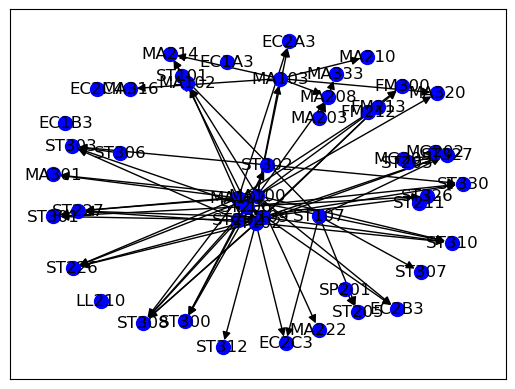

In [24]:

options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

nx.draw_networkx(graph, arrows=True, **options)

<b> Creating the graph with different layouts </b>

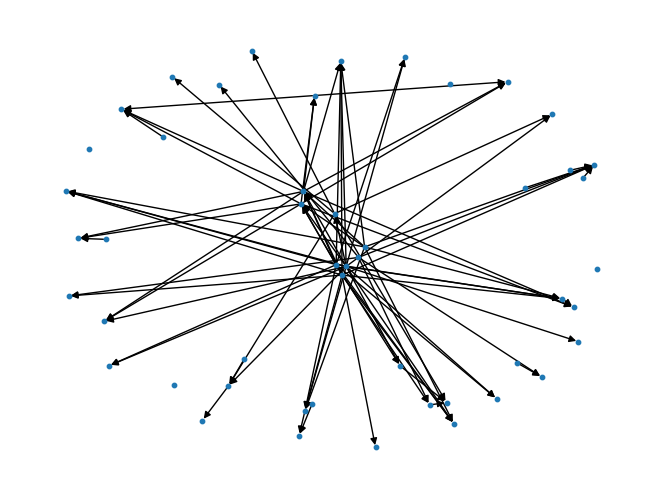

In [37]:
# Draw the graph with spring layout and labels
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, node_size=10, arrows=True)


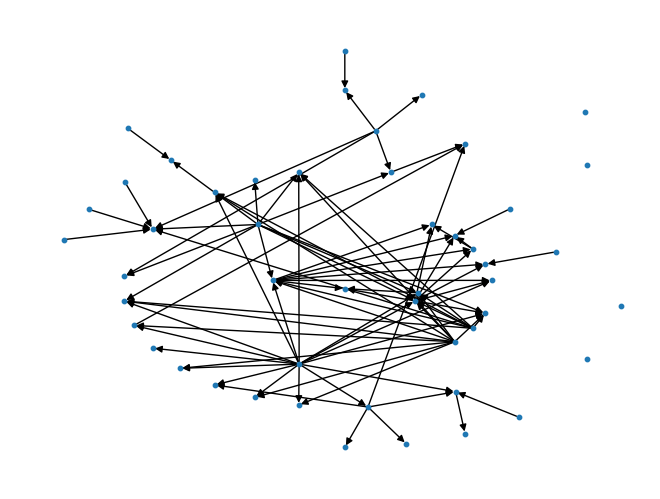

In [39]:
from networkx.drawing.nx_agraph import graphviz_layout

pos = graphviz_layout(graph, prog="twopi", root=0)

nx.draw(graph, pos=pos, node_size = 10)

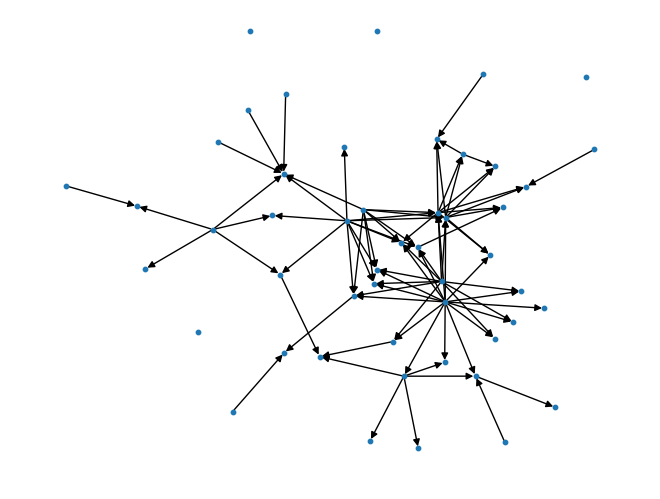

In [33]:
#Naeto layout

pos_3 = graphviz_layout(graph, prog="neato")
nx.draw(graph, pos=pos_3, node_size = 10)

<b> Calculating the centralities </b>

The most relevant measures of centrality would be betweenness centrality because it measures how often a node serves as a bridge in the network meaning that the most important nodes for this centralit measure are the modules that provide connections to the most other modules. As well as, closeness centrality as it measures how easily a node can reach any other node in the network, so how easily taking a specific module will allow you to take other modules. That is why these two measures of centrality have been chose to be used as part of the layouts. 

- Betweeness centrality 
- Closeness centrality 

Various graph layouts will be tried using these centralities to see which layout provides teh clearest visualisation to answer the desired question for this section

In [52]:
degree_c = nx.degree_centrality(graph)
closeness_c = nx.closeness_centrality(graph)

<b> Graphing with the naeto layout and centralities to identify important modules </b>

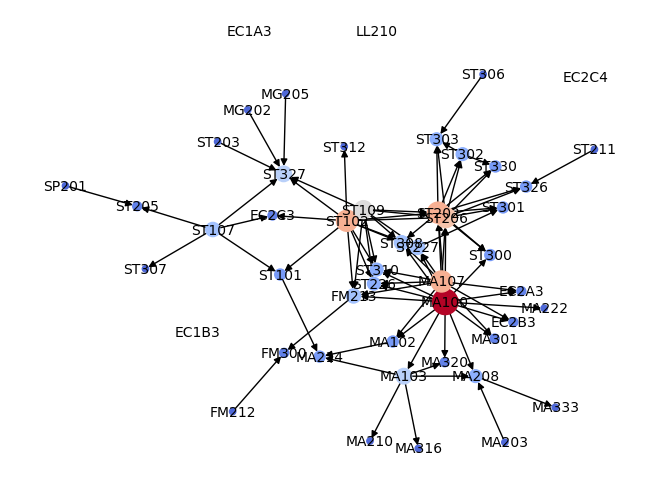

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#Node degree centrality with Neato layout
pos_3 = graphviz_layout(graph, prog="neato")
nsize = np.array([v for v in degree_c.values()])
nx.draw(graph, node_color = nsize, 
        node_size = nsize*1000, cmap=plt.cm.coolwarm, pos = pos_3)


#Creating vertex labels 
names= {n: n for n in graph.nodes()}
nx.draw_networkx_labels(graph, pos_3, names, font_size=10)

plt.show()

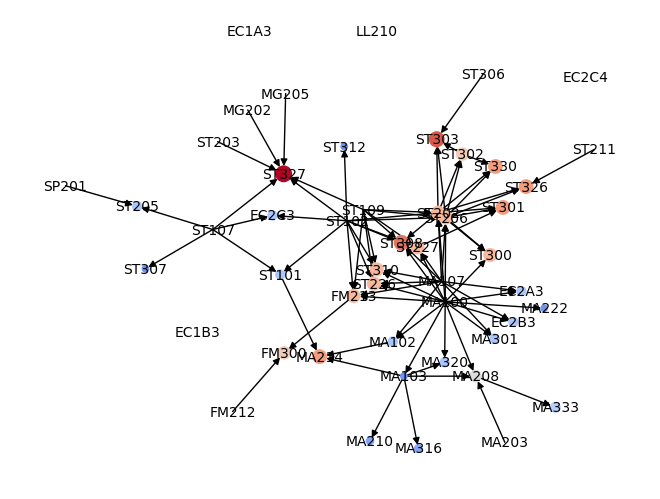

In [50]:
#Closeness centrality with naeto layout

nsize = np.array([v for v in closeness_c.values()])
nx.draw(graph, node_color = nsize, 
        node_size = nsize*1000, cmap=plt.cm.coolwarm, pos = pos_3)

nx.draw_networkx_labels(graph, pos_3, names, font_size = 10)

plt.show()

# Conclusion

## Summary

Below we have summarised the main results for each section however each section has its own findings sub-section which may explain the findings in more detail.

Here are the main questions that we set out to answer with each section of our project and the relevant answers and findings:

SECTION 1: APPLICATION TRENDS
- How have the number of applicants, offer holders and acceptees for each course in the LSE Statistics department changed overtime?

SECTION 2: Personal Statement insights
- What are the main topics that LSE BSc Data Science students talk about in their personal statement?

SECTION 3: Module Choices
- What compulsory and optional modules in BSc Data Science require pre-requisite modules? Which modules allow a BSc Data Science student a wider range of options over the course of their degree?

## Limitations 

## What else can be done